# Package

In [ ]:
!pip install streamlit
!pip install category_encoders
!pip install streamlit
!pip install streamlit-option-menu
!pip install pyngrok
!pip install --upgrade scipy

In [ ]:
import pandas as pd
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import pickle

In [ ]:
icm_df=pd.read_csv("https://raw.githubusercontent.com/Muthusachu/Industrial-Copper-Modeling/main/Copper_Set.xlsx%20-%20Result%201.csv")

<ipython-input-245-9bd43d0208e0>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  icm_df=pd.read_csv("https://raw.githubusercontent.com/Muthusachu/Industrial-Copper-Modeling/main/Copper_Set.xlsx%20-%20Result%201.csv")


# Code

In [ ]:
icm_df.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.0


In [ ]:
#Here i"am going to drop the '[id] & [material_ref]' column beacuse it's not relevant prediction & it will not affect model. It is just for referance
icm_df=icm_df.drop(columns=['id','material_ref','product_ref','application'])


In [ ]:
icm_df.head(2)

,item_date,quantity tons,customer,country,status,item type,thickness,width,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,2.0,1500.0,20210701.0,854.0
1,20210401.0,768.024839,30202938.0,25.0,Won,W,0.8,1210.0,20210401.0,1047.0


In [ ]:
icm_df.isnull().sum()

item_date         1
quantity tons     0
customer          1
country          28
status            2
item type         0
thickness         1
width             0
delivery date     1
selling_price     1
dtype: int64

In [ ]:
icm_df.shape

(181673, 10)

In [ ]:
# Drop rows with missing target values in columns
icm_df = icm_df.dropna(how= 'any')

In [ ]:
icm_df.shape

(181638, 10)

In [ ]:
icm_df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
thickness        0
width            0
delivery date    0
selling_price    0
dtype: int64

In [ ]:
#checking the data types of the Dataframe
icm_df.dtypes

item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
thickness        float64
width            float64
delivery date    float64
selling_price    float64
dtype: object

In [ ]:
icm_df.head(2)

,item_date,quantity tons,customer,country,status,item type,thickness,width,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,2.0,1500.0,20210701.0,854.0
1,20210401.0,768.024839,30202938.0,25.0,Won,W,0.8,1210.0,20210401.0,1047.0


In [ ]:
# Convert date columns to datetime
icm_df['item_date'] = pd.to_datetime(icm_df['item_date'], format='%Y%m%d', errors='coerce')
icm_df['delivery date'] = pd.to_datetime(icm_df['delivery date'], format='%Y%m%d', errors='coerce')


In [ ]:
# Remove or handle non-numeric values
icm_df['quantity tons'] = pd.to_numeric(icm_df['quantity tons'], errors='coerce')

# Handle missing values (if any) after conversion
icm_df['quantity tons'].fillna(0, inplace=True)  # You can choose other strategies like median or mean

# Convert the columns to integers
icm_df['quantity tons'] = icm_df['quantity tons'].astype(float)

In [ ]:
# Definition and Usage.
#The select_dtypes() method returns a new DataFrame that includes/excludes columns of the specified dtype(s).
# Note: You must specify at least one of the parameters include and/or exclude , or else you will get an error.

In [ ]:
# number is a class from the NumPy library that represents all numeric types.
#The numpy. number class takes no arguments.
# We can use this class as an argument to the select_dtypes method of pandas DataFrames to select (or exclude) the numeric columns.

In [ ]:
# Identifying types of variables
categorical_columns = [ 'status', 'item type']
numerical_columns = icm_df.select_dtypes(include=[np.number]).columns.tolist() # Get the column names and convert to list

In [ ]:
numerical_columns

['quantity tons', 'customer', 'country', 'thickness', 'width', 'selling_price']

In [ ]:
# The SimpleImputer class provides basic strategies for imputing missing values.
# Missing values can be imputed with a provided constant value, or
# using the statistics (mean, median or most frequent) of each column in which the missing values are located.

In [ ]:
# Impute missing values in numerical columns with median
imputer = SimpleImputer(strategy='median')
icm_df[numerical_columns] = imputer.fit_transform(icm_df[numerical_columns])

# Impute missing values in categorical columns with mode
for col in categorical_columns:
    icm_df[col] = icm_df[col].fillna(icm_df[col].mode()[0])

In [ ]:
# Initial data overview
print(icm_df.info())

# Count NaNs in each column
nan_count = icm_df.isna().sum()
print(nan_count)

<class 'pandas.core.frame.DataFrame'>
Index: 181638 entries, 0 to 181672
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181636 non-null  datetime64[ns]
 1   quantity tons  181638 non-null  float64       
 2   customer       181638 non-null  float64       
 3   country        181638 non-null  float64       
 4   status         181638 non-null  object        
 5   item type      181638 non-null  object        
 6   thickness      181638 non-null  float64       
 7   width          181638 non-null  float64       
 8   delivery date  181636 non-null  datetime64[ns]
 9   selling_price  181638 non-null  float64       
dtypes: datetime64[ns](2), float64(6), object(2)
memory usage: 15.2+ MB
None
item_date        2
quantity tons    0
customer         0
country          0
status           0
item type        0
thickness        0
width            0
delivery date    2
selling_price    0
dty

In [ ]:
#['item_date', 'delivery date'] having nul value, i replace it using mode()

In [ ]:
nul_col = ['item_date', 'delivery date']
for col in nul_col:
    icm_df[col].fillna(icm_df[col].mode()[0], inplace=True)

In [ ]:
# Count NaNs in each column
nan_count = icm_df.isna().sum()
print(nan_count)

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
thickness        0
width            0
delivery date    0
selling_price    0
dtype: int64


In [ ]:
icm_df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [ ]:
icm_df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [ ]:
df_c=icm_df.copy()

In [ ]:
df_c.head()

,item_date,quantity tons,customer,country,status,item type,thickness,width,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,2.00,1500.0,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,0.80,1210.0,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,0.38,952.0,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,2.30,1317.0,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,4.00,2000.0,2021-03-01,577.00


In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_c['status_EC'] = label_encoder.fit_transform(df_c['status'])
df_c['item type_EC'] = label_encoder.fit_transform(df_c['item type'])

In [ ]:
df_c.head()

,item_date,quantity tons,customer,country,status,item type,thickness,width,delivery date,selling_price,status_EC,item type_EC
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,2.00,1500.0,2021-07-01,854.00,7,5
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,0.80,1210.0,2021-04-01,1047.00,7,5
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,0.38,952.0,2021-01-01,644.33,7,6
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,2.30,1317.0,2021-01-01,768.00,7,3
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,4.00,2000.0,2021-03-01,577.00,7,5


In [ ]:
df_c.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'thickness', 'width', 'delivery date', 'selling_price',
       'status_EC', 'item type_EC'],
      dtype='object')

In [ ]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot
  # plt.subplot(1,3,2)
  # sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  # plt.title("histogram plot for"+" "+column)

  #boxplot
  plt.subplot(1,3,3)
  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

In [ ]:
scw=['quantity tons', 'customer', 'thickness', 'width', 'selling_price', 'status_EC', 'item type_EC']

<ipython-input-275-838c20ad1a17>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-275-838c20ad1a17>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-275-838c20ad1a17>:6: UserWarning: 

`distplot` is a deprecated function and will be removed i

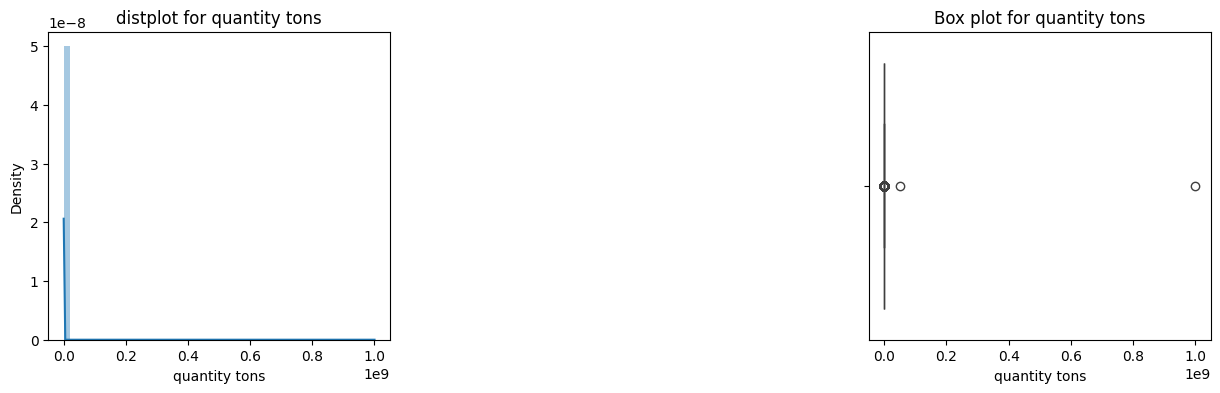

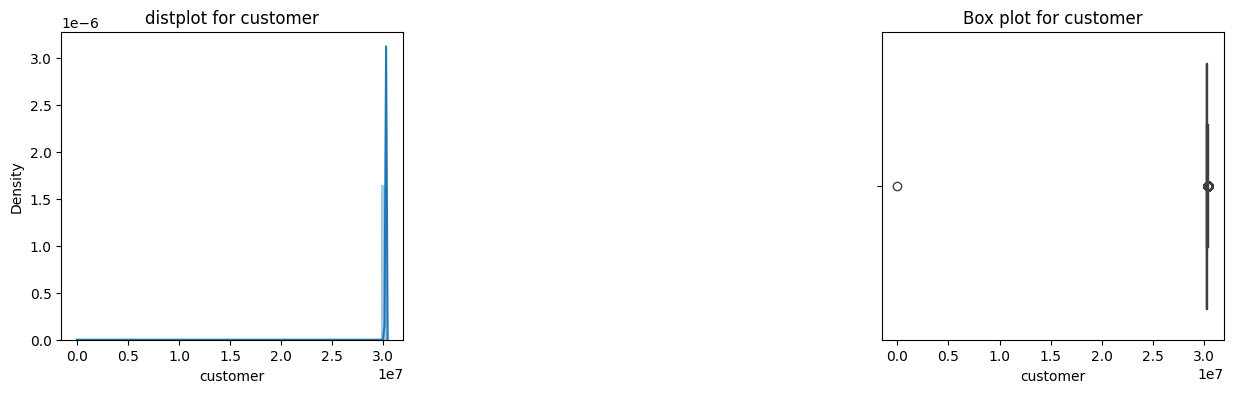

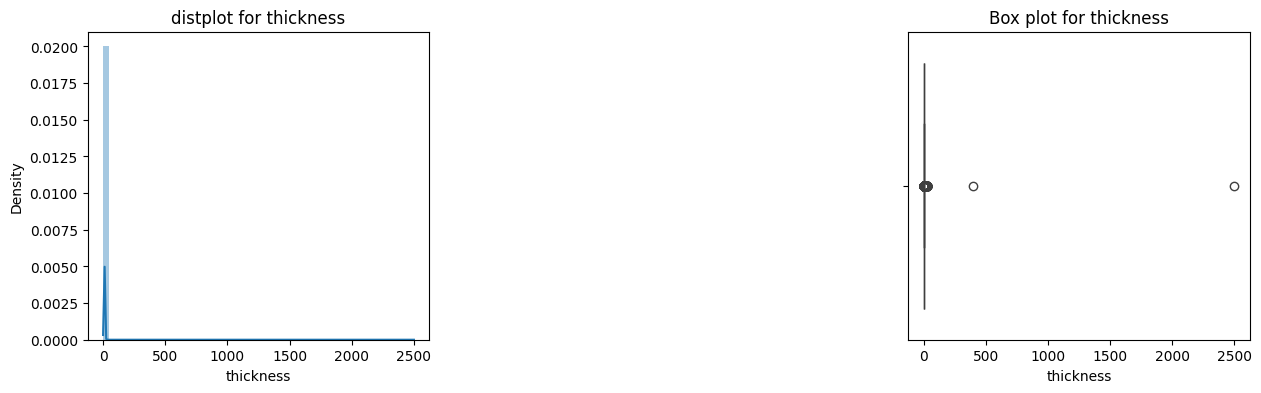

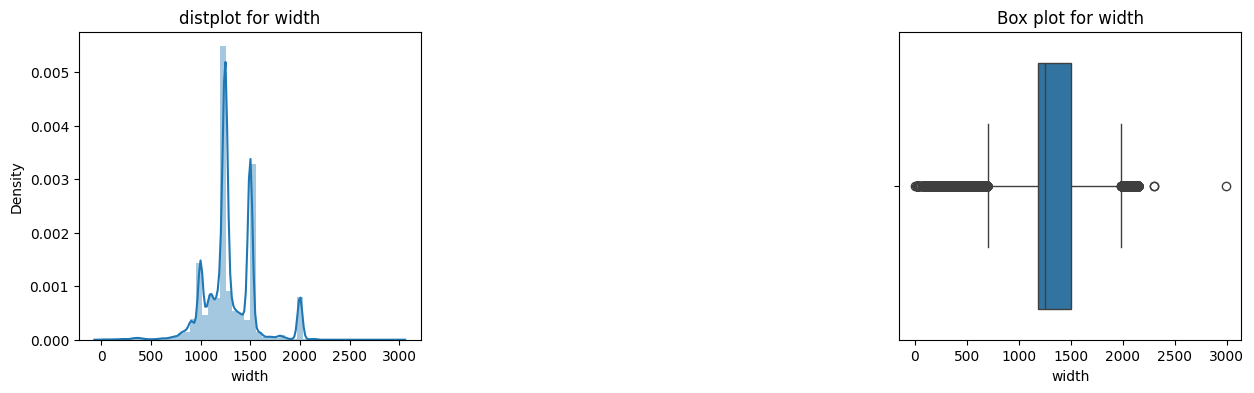

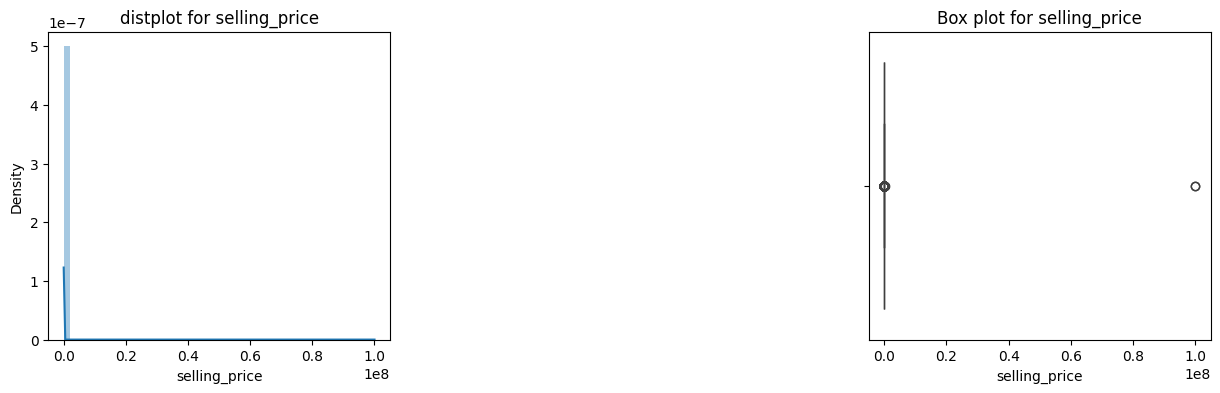

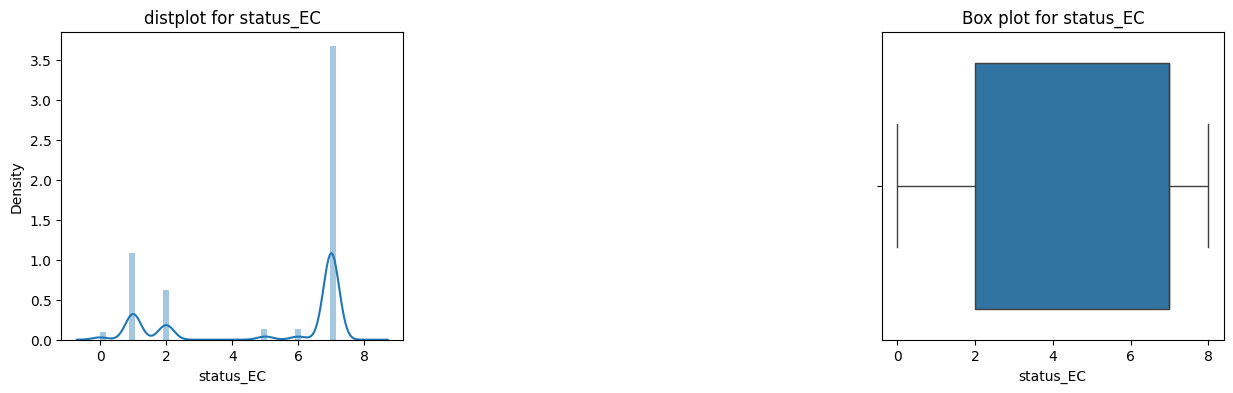

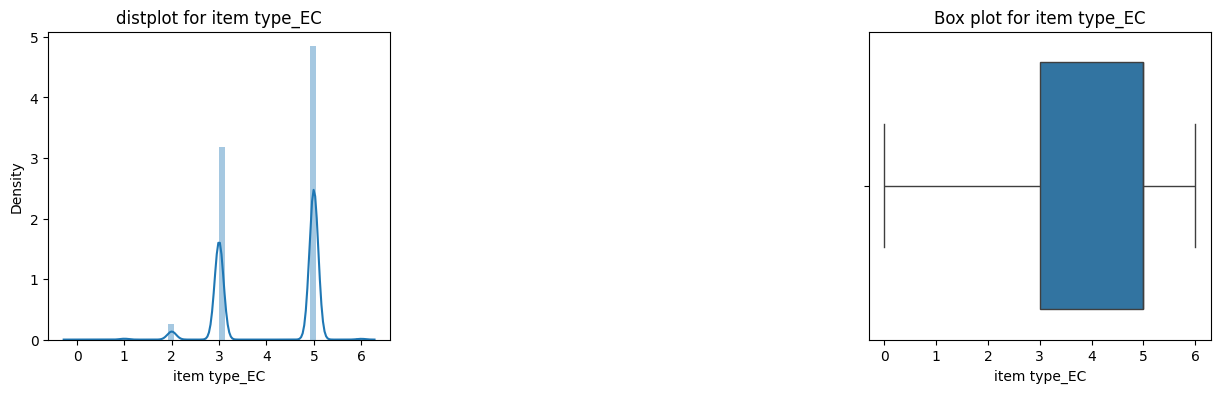

In [ ]:
for i in scw:
  plot(df_c,i)

In [ ]:
# OUTLIER -- An outlier is a single data point that goes far outside the average value of a group of statistics.

# IQR -- The IQR measures the spread of the middle 50% of the data.
#        By multiplying the IQR by 1.5 and adding this product to Q3 or subtracting it from Q1, we create a range that helps in identifying outliers.

# CLIP -- The primary purpose of the clip function is to ensure that all values fall within a defined minimum and maximum range.

In [ ]:
stop

NameError: name 'stop' is not defined

In [ ]:
# def outlier(df,column):
#   q1= df[column].quantile(0.25)
#   q3= df[column].quantile(0.75)

#   iqr= q3-q1

#   upper_bound_range= q3 + (1.5*iqr)
#   lower_bound_range= q1 - (1.5*iqr)

#   df[column]= df[column].clip( lower_bound_range, upper_bound_range)

In [ ]:
# Skewness helps in understanding the distribution shape & outlier.
# Skewness analysis often leads to data transformations (like log or square root transformations) to reduce skewness and stabilize variance.

In [ ]:
# for i in scw:
#   outlier(df_c,i)

In [ ]:
# for i in scw:
#   plot(df_c,i)

In [ ]:
df_c.head(3)

,item_date,quantity tons,customer,country,status,item type,thickness,width,delivery date,selling_price,status_EC,item type_EC
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,2.00,1500.0,2021-07-01,854.00,7,5
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,0.80,1210.0,2021-04-01,1047.00,7,5
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,0.38,952.0,2021-01-01,644.33,7,6


In [ ]:
df_c.shape

(181638, 12)

In [ ]:
numerical_columns

['quantity tons', 'customer', 'country', 'thickness', 'width', 'selling_price']

In [ ]:
from sklearn.ensemble import IsolationForest

# Use IsolationForest to detect outliers in numerical columns
iso = IsolationForest(contamination=0.02)
outliers = iso.fit_predict(df_c[numerical_columns])

# Remove outliers
df_c = df_c[outliers != -1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
df_c.shape

(178005, 12)

In [ ]:
stop # 10% -- (179823, 12)

In [ ]:
from scipy.stats import skew

# Identify skewness in numerical columns
skewed_features = df_c[numerical_columns].apply(lambda x: skew(x)).sort_values(ascending=False)
print(skewed_features)

high_skew = skewed_features[skewed_features > 0.75]
print(high_skew)

from scipy.special import boxcox1p # Import boxcox1p from scipy.special

# Apply boxcox transformation to high skew features
for feature in high_skew.index:
    df_c[feature] = boxcox1p(df_c[feature], 0.15)



selling_price    421.901839
quantity tons      6.238611
thickness          2.279249
country            0.768153
width              0.409310
customer        -152.537533
dtype: float64
selling_price    421.901839
quantity tons      6.238611
thickness          2.279249
country            0.768153
dtype: float64


<ipython-input-275-838c20ad1a17>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-275-838c20ad1a17>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-275-838c20ad1a17>:6: UserWarning: 

`distplot` is a deprecated function and will be removed i

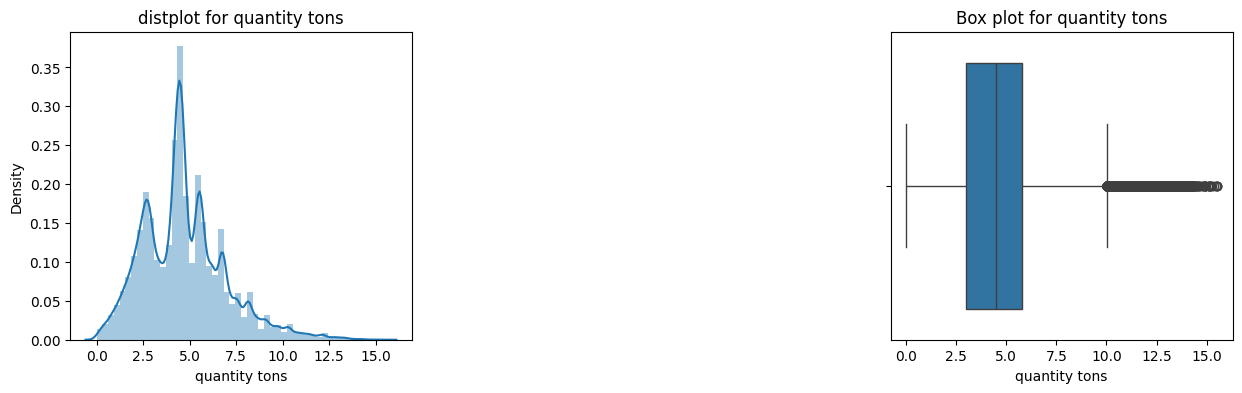

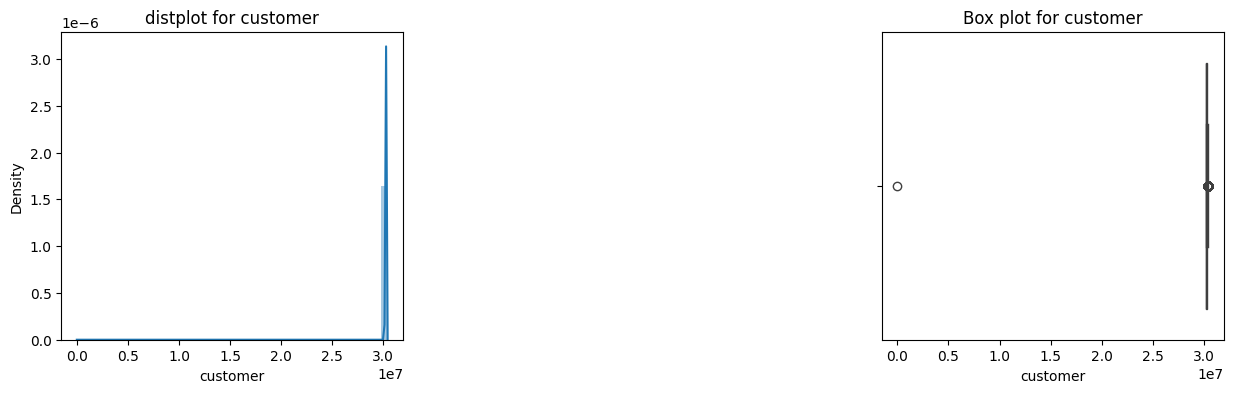

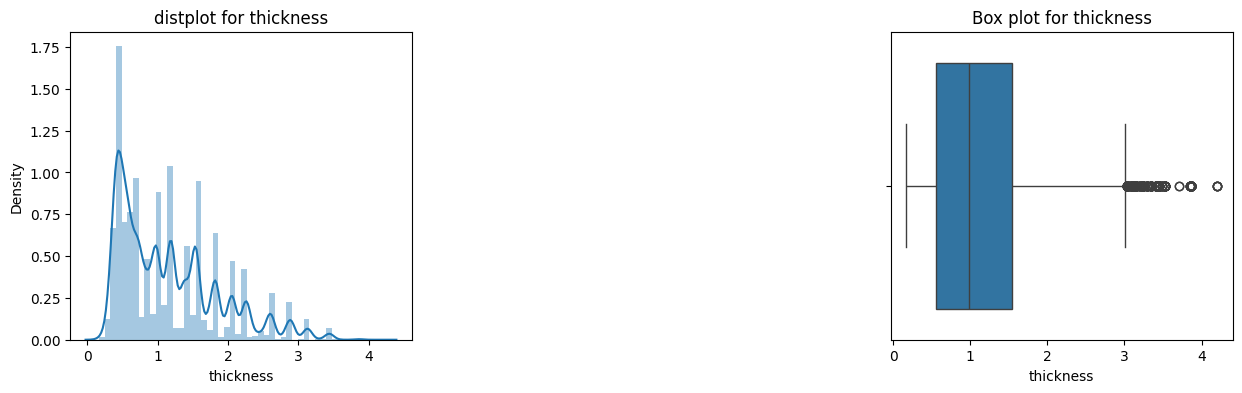

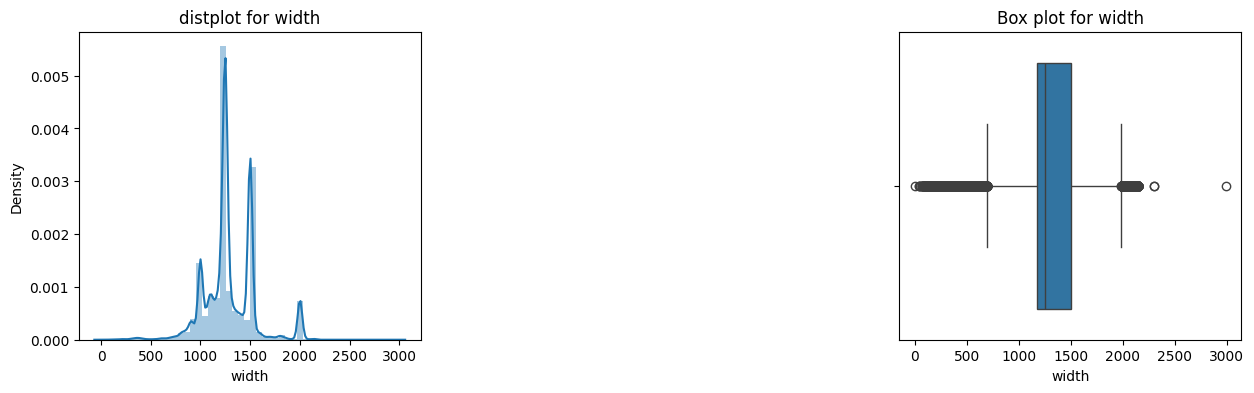

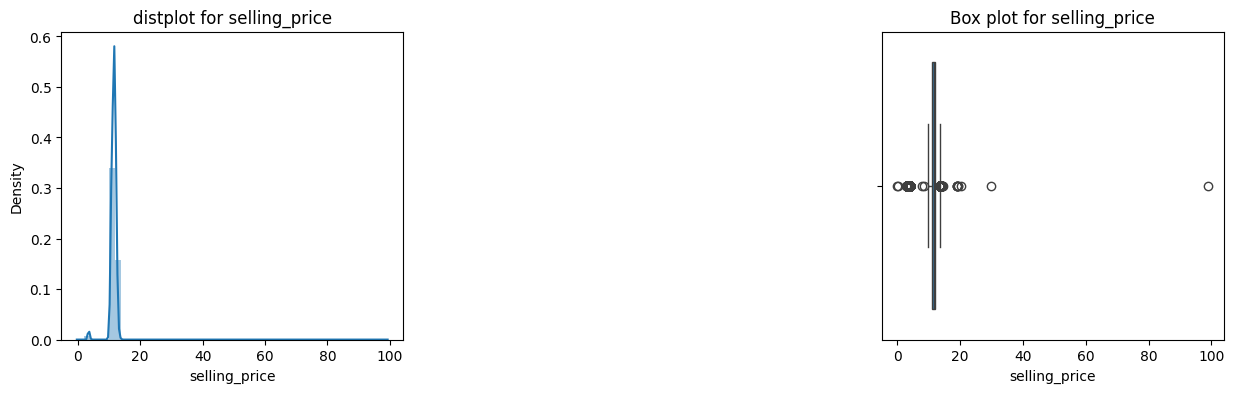

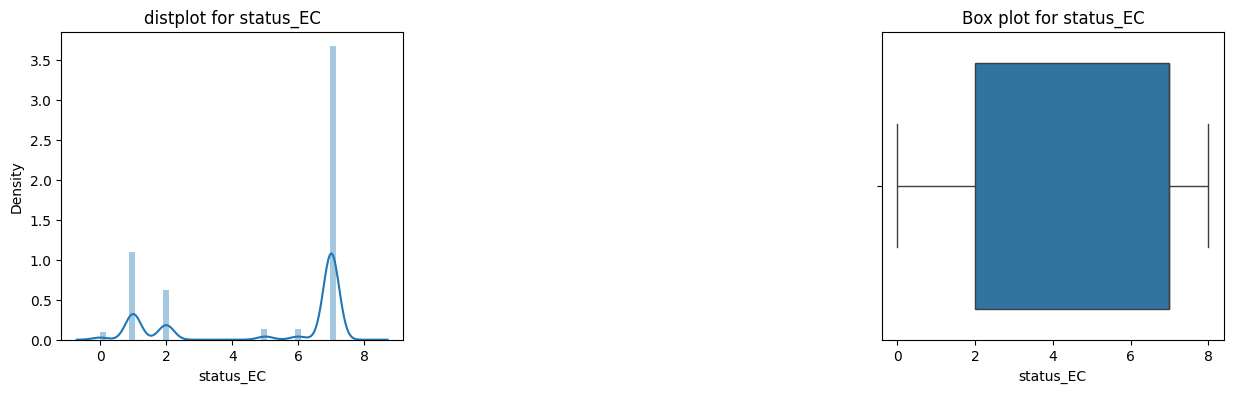

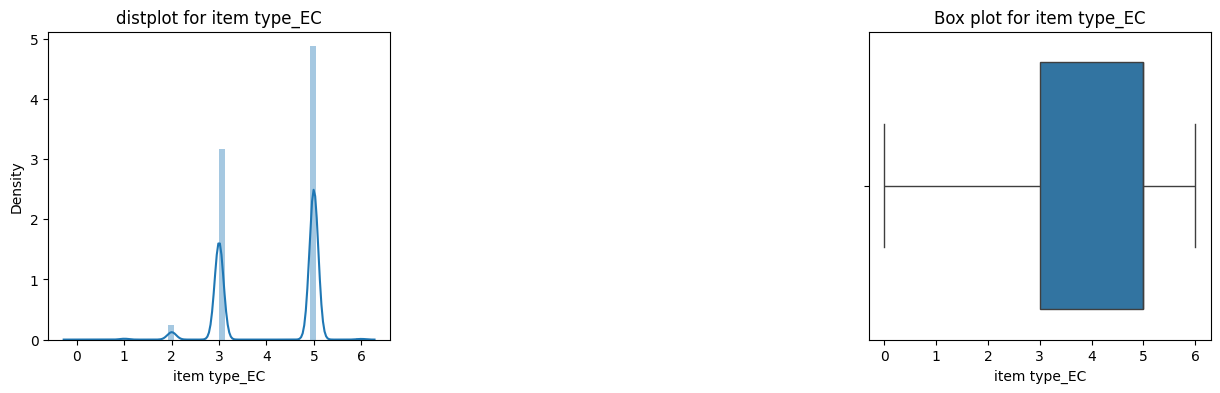

In [ ]:
for i in scw:
  plot(df_c,i)

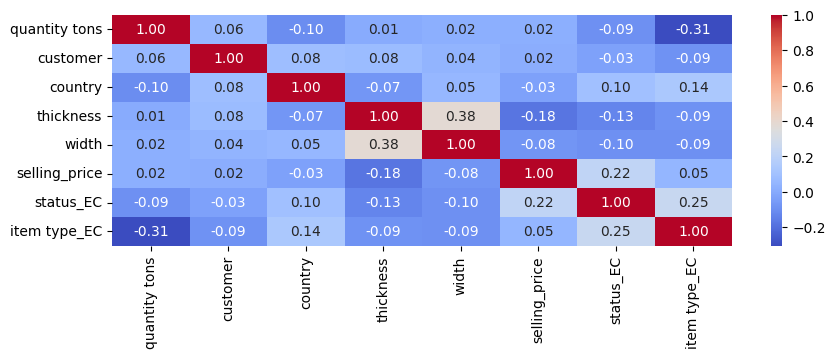

In [ ]:
#Checking the correlation with using the heatmap

corr_matrix= df_c.drop(columns=['item_date', 'status',
       'item type','delivery date']).corr()
plt.figure(figsize=(10,3))
sns.heatmap(corr_matrix, annot= True, cmap='coolwarm', fmt="0.2f")
plt.show()

In [ ]:
# Drop highly correlated columns
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
highly_correlated = [column for column in upper.columns if any(upper[column] > 0.9)]
df_c = df_c.drop(columns=highly_correlated)

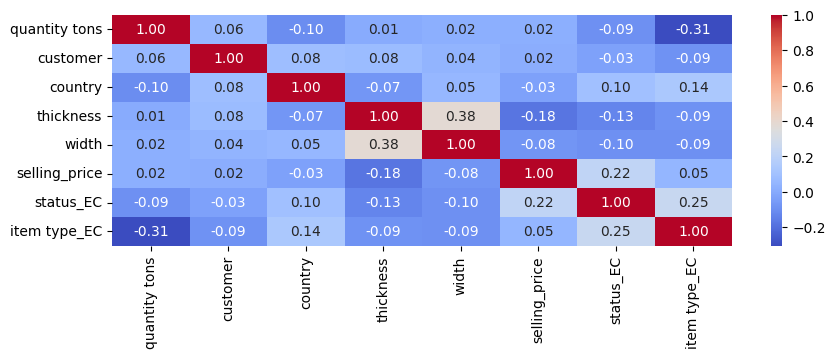

In [ ]:
#Checking the correlation with using the heatmap

corr_matrix= df_c.drop(columns=['item_date', 'status',
       'item type','delivery date']).corr()
plt.figure(figsize=(10,3))
sns.heatmap(corr_matrix, annot= True, cmap='coolwarm', fmt="0.2f")
plt.show()

In [ ]:
# Extract date features Year & month
df_c['item_year'] = pd.to_datetime(df_c['item_date'], format='%Y%m%d', errors='coerce').dt.year
df_c['item_month'] = pd.to_datetime(df_c['item_date'], format='%Y%m%d', errors='coerce').dt.month
df_c['delivery_year'] = pd.to_datetime(df_c['delivery date'], format='%Y%m%d', errors='coerce').dt.year
df_c['delivery_month'] = pd.to_datetime(df_c['delivery date'], format='%Y%m%d', errors='coerce').dt.month

In [ ]:
df_c.head()

,item_date,quantity tons,customer,country,status,item type,thickness,width,delivery date,selling_price,status_EC,item type_EC,item_year,item_month,delivery_year,delivery_month
0,2021-04-01,5.499168,30156308.0,4.380946,Won,W,1.194318,1500.0,2021-07-01,11.686189,7,5,2021,4,2021,7
1,2021-04-01,11.396746,30202938.0,4.201461,Won,W,0.614477,1210.0,2021-04-01,12.255154,7,5,2021,4,2021,4
2,2021-04-01,9.629555,30153963.0,4.492018,Won,WI,0.329991,952.0,2021-01-01,10.927796,7,6,2021,4,2021,1
3,2021-04-01,8.130035,30349574.0,4.597157,Won,S,1.307510,1317.0,2021-01-01,11.396658,7,3,2021,4,2021,1
4,2021-04-01,11.457820,30211560.0,4.380946,Won,W,1.820334,2000.0,2021-03-01,10.639382,7,5,2021,4,2021,3


In [ ]:
# Drop original date columns
df_c2 = df_c.drop(columns=['status',	'item type' ,'item_date', 'delivery date'])

In [ ]:
df_c2.head()

,quantity tons,customer,country,thickness,width,selling_price,status_EC,item type_EC,item_year,item_month,delivery_year,delivery_month
0,5.499168,30156308.0,4.380946,1.194318,1500.0,11.686189,7,5,2021,4,2021,7
1,11.396746,30202938.0,4.201461,0.614477,1210.0,12.255154,7,5,2021,4,2021,4
2,9.629555,30153963.0,4.492018,0.329991,952.0,10.927796,7,6,2021,4,2021,1
3,8.130035,30349574.0,4.597157,1.307510,1317.0,11.396658,7,3,2021,4,2021,1
4,11.457820,30211560.0,4.380946,1.820334,2000.0,10.639382,7,5,2021,4,2021,3


In [ ]:
#packages

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pickle
from sklearn.metrics import mean_absolute_error

# Regression Method - Predict the Selling Price

In [ ]:
reg_df=df_c2.copy()

In [ ]:
reg_df.to_csv("reg_df.csv")

In [ ]:
reg_df.isna().sum()

quantity tons     4
customer          0
country           0
thickness         0
width             0
selling_price     5
status_EC         0
item type_EC      0
item_year         0
item_month        0
delivery_year     0
delivery_month    0
dtype: int64

In [ ]:

  # Handle missing values in the target variable

  reg_df = reg_df.fillna(reg_df.mean()) # Fill NaNs in 'reg_df' with its mean

In [ ]:
reg_df.isna().sum()

quantity tons     0
customer          0
country           0
thickness         0
width             0
selling_price     0
status_EC         0
item type_EC      0
item_year         0
item_month        0
delivery_year     0
delivery_month    0
dtype: int64

In [ ]:
algo= [LinearRegression, RandomForestRegressor, ExtraTreesRegressor, XGBRegressor]

In [ ]:
for i in algo:
  print(str(i).split(".")[-1][:-2])

LinearRegression
RandomForestRegressor
ExtraTreesRegressor
XGBRegressor


In [ ]:
def accreg(df,algorithm):

  x= df.drop(columns=["selling_price", 'status_EC'], axis=1)
  y= df["selling_price"]

  # Handle missing values using SimpleImputer
  imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean
  x = imputer.fit_transform(x)

  #train test splitting
  x_train,x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)
  model= algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  r2_train= r2_score(y_train, y_pred_train)
  r2_test= r2_score(y_test, y_pred_test)

  mae = mean_absolute_error(y_test, y_pred_test)

  metrics={"Algorithm":str(algorithm).split(".")[-1][:-2],
           "R2_Train": r2_train,
           "R2_Test": r2_test,
           'Mean Absolute Error' : mae
           }

  return metrics

In [ ]:
for i in algo:
  print(accreg(reg_df,i))


{'Algorithm': 'LinearRegression', 'R2_Train': 0.127703959656162, 'R2_Test': 0.13803997283398994, 'Mean Absolute Error': 0.45510473677896285}
{'Algorithm': 'RandomForestRegressor', 'R2_Train': 0.9550622998761734, 'R2_Test': 0.6961866760175985, 'Mean Absolute Error': 0.21016246377151904}
{'Algorithm': 'ExtraTreesRegressor', 'R2_Train': 1.0, 'R2_Test': 0.6742650504150742, 'Mean Absolute Error': 0.2028891709495061}
{'Algorithm': 'XGBRegressor', 'R2_Train': 0.6801328910158002, 'R2_Test': 0.6163704745458519, 'Mean Absolute Error': 0.2980765255417974}


In [ ]:
# {'Algorithm': 'LinearRegression', 'R2_Train': 0.468549311251965, 'R2_Test': 0.46651965408030616, 'Mean Absolute Error': 107.43817871592877}
# {'Algorithm': 'RandomForestRegressor', 'R2_Train': 0.976325113515493, 'R2_Test': 0.8522852731435965, 'Mean Absolute Error': 43.96481332090234}
# {'Algorithm': 'ExtraTreesRegressor', 'R2_Train': 0.9963788165372822, 'R2_Test': 0.8394103910973613, 'Mean Absolute Error': 44.29720565901377}
# {'Algorithm': 'XGBRegressor', 'R2_Train': 0.8191726070891573, 'R2_Test': 0.7971398159535676, 'Mean Absolute Error': 58.097883703437205}

In [ ]:
# Separate features and target variable
X = reg_df.drop(columns=['selling_price', 'status_EC'])
y = reg_df['selling_price']

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', ExtraTreesRegressor(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 0.20419439090204475


In [ ]:
# Mean Absolute Error: 44.036096178098546

In [ ]:
# Hyperparameter tuning for RandomForestRegressor
param_grid = {
    'model__n_estimators': [10, 20, 30],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth': [10, 12, 15]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {-grid_search.best_score_}')

# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best Parameters: {'model__max_depth': 15, 'model__max_features': 'auto', 'model__n_estimators': 30}
Best Score: 0.2807305311377502
Mean Absolute Error: 0.2766984029733567


In [ ]:
# Save the trained model to a file
model_filename = 'REG_trained_model.pkl'
with open(model_filename, 'wb') as file:
  pickle.dump(best_model, file)

print(f'Model saved to {model_filename}')


Model saved to REG_trained_model.pkl


In [ ]:
# Load the trained model from a file
with open(model_filename, 'rb') as file:
  loaded_model = pickle.load(file)

In [ ]:
reg_df.columns

Index(['quantity tons', 'customer', 'country', 'thickness', 'width',
       'selling_price', 'status_EC', 'item type_EC', 'item_year', 'item_month',
       'delivery_year', 'delivery_month'],
      dtype='object')

In [ ]:
reg_df.head(2)

,quantity tons,customer,country,thickness,width,selling_price,status_EC,item type_EC,item_year,item_month,delivery_year,delivery_month
0,5.499168,30156308.0,4.380946,1.194318,1500.0,11.686189,7,5,2021,4,2021,7
1,11.396746,30202938.0,4.201461,0.614477,1210.0,12.255154,7,5,2021,4,2021,4


In [ ]:
#quantity tons/	customer/	country/	thickness/	width/	item type_EC/	 item_year/	 item_month/	 delivery_year/	 delivery_month

# Use the loaded model to make predictions
check = [54.151139,	30156308.0,	28.0,	0.8,	1210.0,	5,	2021,	4,	2021,	7]

y_loaded_pred = loaded_model.predict([check])

In [ ]:
y_loaded_pred

array([12.35571369])

# ML Classification model predicts Status: WON or LOST.

In [ ]:
class_df=df_c2.copy()

In [ ]:
df_c['status'].unique()

In [ ]:
dfw=df_c[df_c['status'] == 'Won'].head(2)
display(dfw)
won_no = dfw['status_EC'].unique()
won_no

In [ ]:
dfl = df_c[df_c['status'] == 'Lost'].head(2)
display(dfl)
lost_no = dfl['status_EC'].unique()
lost_no

In [ ]:
class_df2 = class_df[class_df['status_EC'].isin([1, 7])]

In [ ]:
class_df2['status_EC'].value_counts()

In [ ]:
class_df2.to_csv("class_df2.csv")

In [ ]:
#balancing the target data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(class_df2.drop(columns=['status_EC','selling_price']), class_df2['status_EC'])

In [ ]:
y_resampled.value_counts()

In [ ]:
def clasmod(df,algorithm):
  #balancing the target data
  from imblearn.over_sampling import SMOTE
  smote = SMOTE()
  X_resampled, y_resampled = smote.fit_resample(df.drop(columns=['status_EC','selling_price']), df['status_EC'])

  #train test splitting
  x_train,x_test, y_train, y_test= train_test_split(X_resampled, y_resampled, test_size= 0.2, random_state=42)
  model= algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  r2_train= r2_score(y_train, y_pred_train)
  r2_test= r2_score(y_test, y_pred_test)

  mae = mean_absolute_error(y_test, y_pred_test)

  metrics={"Algorithm":str(algorithm).split(".")[-1][:-2],
           "R2_Train": r2_train,
           "R2_Test": r2_test,
           'Mean Absolute Error' : mae
           }

  return metrics

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve


In [ ]:
algo2= [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier]

In [ ]:
for i in algo2:
  print(clasmod(class_df2,i))


In [ ]:
# {'Algorithm': 'LogisticRegression', 'R2_Train': -0.754199714960581, 'R2_Test': -0.7675649879161357, 'Mean Absolute Error': 2.651280062063615}
# {'Algorithm': 'DecisionTreeClassifier', 'R2_Train': 0.9998922481747567, 'R2_Test': 0.7853578727183039, 'Mean Absolute Error': 0.32195500387897596}
# {'Algorithm': 'RandomForestClassifier', 'R2_Train': 0.9998922481747567, 'R2_Test': 0.8810417125908673, 'Mean Absolute Error': 0.17843289371605897}

In [ ]:
#randomforestclassifier give the best r2 score & best Mean Absolute Erro

In [ ]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(class_df2.drop(columns=['status_EC','selling_price']), class_df2['status_EC'])

#train test splitting
x_train,x_test, y_train, y_test= train_test_split(X_resampled, y_resampled, test_size= 0.2, random_state=42)

In [ ]:
# Define the Random Forest model pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
rf_pipeline.fit(x_train, y_train)

# Predict on the test set
y_pred_rf = rf_pipeline.predict(x_test)

y_pred_train= rf_pipeline.predict(x_train)
y_pred_test= rf_pipeline.predict(x_test)

r2_train= r2_score(y_train, y_pred_train)
r2_test= r2_score(y_test, y_pred_test)

mae = mean_absolute_error(y_test, y_pred_test)

metrics={ "R2_Train": r2_train,
          "R2_Test": r2_test,
          'Mean Absolute Error' : mae}

print(metrics)

# Evaluate the model
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC-AUC Curve
y_pred_proba_rf = rf_pipeline.predict_proba(x_test)[:, 1]
# Assuming 7 is the positive label
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf, pos_label=7)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='best')
plt.show()


In [ ]:
# Save the trained model to a file
model_filename = 'CLASS_trained_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf_pipeline, file)  # Change rf_pipeline to the pipeline of your chosen model

print(f'Model saved to {model_filename}')

In [ ]:
# Load the trained model from a file
with open(model_filename, 'rb') as file:
    loaded_model2 = pickle.load(file)

In [ ]:
class_df2[class_df2['status_EC'] == 7].head(10)

In [ ]:
#quantity tons	/customer	/country	/thickness	/width	/item type_EC	/item_year	/item_month	/delivery_year	/delivery_month

# Use the loaded model to make predictions
check3 = [69.071853,	30341428.0,	38.0,	0.60,	1275.0,	3,	2021,	4,	2021,	7]

y_loaded_pred3 = loaded_model2.predict([check3])

In [ ]:
y_loaded_pred3

# Streamlit part

In [ ]:
dfff=pd.read_csv("reg_df.csv")
dfff.head(2)

In [ ]:
dfff['quantity tons'].nunique()

In [ ]:
iy = dfff['item_year'].unique()
iy.sort()
iy

In [ ]:
dm=dfff['delivery_month'].unique()
dm.sort()
dm

In [ ]:
dy = dfff['delivery_year'].unique()
dy.sort()
dy

In [ ]:
%%writefile ICM_App.py

import pandas as pd
import streamlit as st
import pickle
import numpy as np
import sklearn
from streamlit_option_menu import option_menu

st.set_page_config(layout= "wide")

st.title(":rainbow[INDUSTRIAL COPPER MODELING]")
st.header(":rainbow[]",  divider='rainbow')

option = option_menu(None, options=["PREDICT SELLING PRICE", "PREDICT STATUS"],
                     icons=['cloud-upload', 'gear'], menu_icon="cast", default_index=0, orientation="horizontal",
                    styles={"container": {"padding": "0!important", "background-color": "#17202A"},
                            "icon": {"color": "#9A7D0A", "font-size": "25px"},
                            "nav-link": {"font-size": "25px", "text-align": "left", "margin":"0px", "--hover-color": "#808080"},
                            "nav-link-selected": {"background-color": "#808000"},
                            })


if option == "PREDICT SELLING PRICE":

  d_f = pd.read_csv("reg_df.csv")

  st.header("**PREDICT SELLING PRICE**")
  st.write(" ")

  col1,col2 = st.columns(2)

  with col1:
    countr=d_f['country'].unique().astype(int)
    countr.sort()
    country=  st.selectbox("**Select the Value for COUNTRY**", countr)
  with col2:
    itm=d_f['item type_EC'].unique().astype(int)
    itm.sort()
    item_type= st.selectbox("**Select the Value for ITEM TYPE**", itm)

  customer = st.slider("Select the Value for CUSTOMER", d_f['customer'].min(), d_f['customer'].max(), d_f['customer'].mean())

  col1,col2= st.columns(2)
  with col1:
    quantity_tons= st.number_input(label="**Enter the Value for QUANTITY_TONS**",
                                   min_value=d_f['quantity tons'].min(), max_value=d_f['quantity tons'].max(),
                                   value=d_f['quantity tons'].mean())
  with col2:
    width = st.number_input(label="**Enter the Value for WIDTH**",
                                   min_value=d_f['width'].min(), max_value=d_f['width'].max(),
                                   value=d_f['width'].mean())

  thickness_ = st.slider(label="**Enter the Value for THICKNESS**",
                                   min_value=d_f['thickness'].min(), max_value=d_f['thickness'].max(),
                                   value=d_f['thickness'].mean())


  col1,col2= st.columns(2)
  with col1:
    im=d_f['item_month'].unique()
    im.sort()
    item_month= st.selectbox("**Select the ITEM MONTH**", im)

  with col2:
    iy = d_f['item_year'].unique()
    iy.sort()
    item_year= st.selectbox("**Select the ITEM YEAR**", iy)

  col1,col2= st.columns(2)
  with col1:
    dm=d_f['delivery_month'].unique()
    dm.sort()
    delivery_month= st.selectbox("**Select the DELIVERY MONTH**", dm)

  with col2:
    dy = d_f['delivery_year'].unique()
    dy.sort()
    delivery_year= st.selectbox("**Select the DELIVERY YEAR**", dy)


  button= st.button(":blue[***PREDICT THE SELLING PRICE***]")

  if button:
    price= [country, item_type, width, quantity_tons, thickness_,
            customer, item_month, item_year, delivery_month, delivery_year]


    with open("/content/REG_trained_model.pkl","rb") as f:
      model_regg=pickle.load(f)

    y_pred= model_regg.predict([price])
    a=int(y_pred[0])
    st.title(f":green[**The Selling Price is : {a}**]")

if option == "PREDICT STATUS":

  st.header("PREDICT STATUS (Won / Lose)")
  st.write(" ")

  d_f2 = pd.read_csv("/content/class_df2.csv")

  col1,col2 = st.columns(2)

  with col1:
    countr=d_f2['country'].unique().astype(int)
    countr.sort()
    country=  st.selectbox("**Select the Value for COUNTRY**", countr)
  with col2:
    itm=d_f2['item type_EC'].unique().astype(int)
    itm.sort()
    item_type= st.selectbox("**Select the Value for ITEM TYPE**", itm)

  customer = st.slider("Select the Value for CUSTOMER", d_f2['customer'].min(), d_f2['customer'].max(), d_f2['customer'].mean())

  col1,col2= st.columns(2)
  with col1:
    quantity_tons= st.number_input(label="**Enter the Value for QUANTITY_TONS**",
                                   min_value=d_f2['quantity tons'].min(), max_value=d_f2['quantity tons'].max(),
                                   value=d_f2['quantity tons'].mean())
  with col2:
    width = st.number_input(label="**Enter the Value for WIDTH**",
                                   min_value=d_f2['width'].min(), max_value=d_f2['width'].max(),
                                   value=d_f2['width'].mean())

  thickness_ = st.slider(label="**Enter the Value for THICKNESS**",
                                   min_value=d_f2['thickness'].min(), max_value=d_f2['thickness'].max(),
                                   value=d_f2['thickness'].mean())


  col1,col2= st.columns(2)
  with col1:
    im=d_f2['item_month'].unique()
    im.sort()
    item_month= st.selectbox("**Select the ITEM MONTH**", im)

  with col2:
    iy = d_f2['item_year'].unique()
    iy.sort()
    item_year= st.selectbox("**Select the ITEM YEAR**", iy)

  col1,col2= st.columns(2)
  with col1:
    dm=d_f2['delivery_month'].unique()
    dm.sort()
    delivery_month= st.selectbox("**Select the DELIVERY MONTH**", dm)

  with col2:
    dy = d_f2['delivery_year'].unique()
    dy.sort()
    delivery_year= st.selectbox("**Select the DELIVERY YEAR**", dy)


  button= st.button(":blue[***PREDICT THE STATUS***]")

  if button:
    price= [country, item_type, width, quantity_tons, thickness_,
            customer, item_month, item_year, delivery_month, delivery_year]


    with open("/content/CLASS_trained_model.pkl","rb") as f:
      model_regg=pickle.load(f)

    y_pred= model_regg.predict([price])
    a=int(y_pred[0])

    if a == 7:
      st.title(":green[**The Status is WON**]")
    else:
      st.title(":red[**The Status is LOSE**]")



In [ ]:
!streamlit run ICM_App.py&>/dev/null&

In [ ]:
!ngrok config add-authtoken 2ciFzJOr8PUy2NH2wKDfMLha8rG_6y1YLoW7AgXxQmuFFGJsU

In [ ]:
from pyngrok import ngrok

public_url = ngrok.connect(addr='8501')
print(public_url)
